In [1]:
from comparative_gsa.utils import plotting

import os

import pandas as pd
import numpy as np

fig_size = (7, 5)

In [2]:
param_path = '../inputs/parameters_naghavi_constrained_fixed_T_v_tot_v_ref_lower_k_pas_further.json'
# Get the filename from the path, without extension
param_filename = os.path.splitext(os.path.basename(param_path))[0]

# Load the combined sobol_df
sobol_df = pd.read_csv(f'../../outputs/sa_results/aggregated_dfs/{param_filename}/combined_sobol_df.csv')

In [3]:
# Get the subset for simulations and n_model_evals=30720
output_to_keep = [
    'p_ao_min',
    'p_ao_max',
    'p_ao_mean',
    'v_ao_min',
    'v_ao_max',
    'v_ao_mean',
    'p_art_min',
    'p_art_max',
    'p_art_mean',
    'v_art_min',
    'v_art_max',
    'v_art_mean'
]


simulations_df = sobol_df[
    (sobol_df["data_type"] == "simulations") &
    (sobol_df["n_model_evals"] == 30720) &
    (sobol_df["output"].isin(output_to_keep))
]

n_simulations_trained_on = 1024

emulations_df = sobol_df[
    (sobol_df["data_type"] == "emulations") &
    (sobol_df["n_model_evals"] == 30720) &
    (sobol_df["output"].isin(output_to_keep)) &
    (sobol_df["n_simulations_trained_on"] == n_simulations_trained_on)
]

In [4]:
sobol_df.columns.to_list()

cols_to_keep = [
  'output',
 'parameter',
 'index',
 'value',
 'confidence'
]

simulations_df = simulations_df[cols_to_keep].reset_index(drop=True)
emulations_df = emulations_df[cols_to_keep].reset_index(drop=True)

In [5]:
index_to_plot = 'ST'

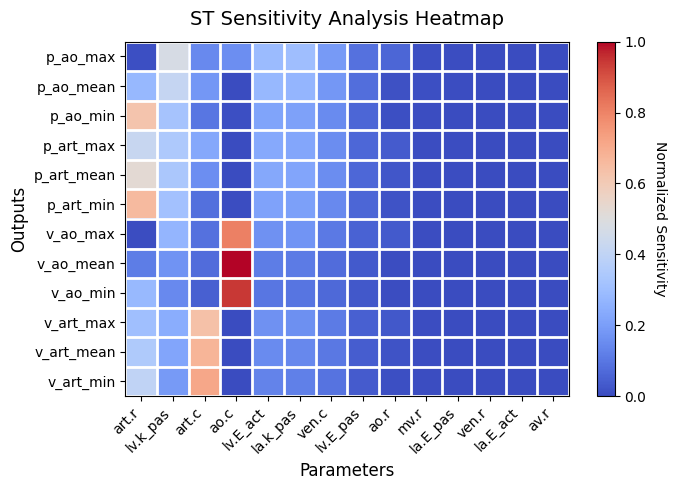

In [6]:
plotting.plot_sa_heatmap(
    simulations_df,
    index=index_to_plot,
    top_n=14,
    cmap="coolwarm",
    normalize=True,
    figsize=fig_size,
    # fname="../../outputs/sa_results/figures/sobol_heatmap.png"
)

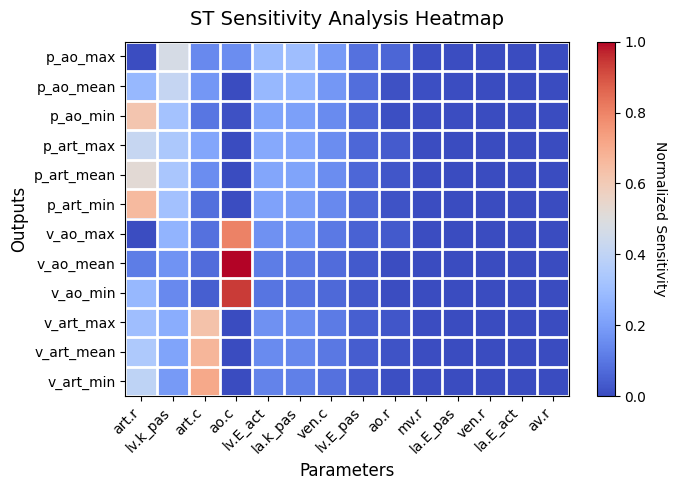

In [7]:
plotting.plot_sa_heatmap(
    emulations_df,
    index=index_to_plot,
    top_n=14,
    cmap="coolwarm",
    normalize=True,
    figsize=fig_size,
    # fname="../../outputs/sa_results/figures/sobol_heatmap.png"
)